In [1]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
end

using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie, JLD2

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


In [2]:
function FHN2_try3(u, p ,t)
    x1, y1, x2, y2, z= u
    ϵ, a, g, k, σ, α, k1, k2 = p

    I(ϕ_i) = g * (1.0/(1.0 + exp(k*(cos(σ/2) - cos(ϕ_i - α - σ/2)))))
    ρz = k1 + k2 * z ^ 2

    ϕ2 = atan(y2, x2)
    ϕ1 = atan(y1, x1)

    dx1dt = (x1 - x1 ^ 3 / 3 - y1 + I(ϕ2) + ρz * (x2 - x1) ) / ϵ
    dy1dt = x1 - a
    dx2dt = (x2 - x2 ^ 3 / 3 - y2 + I(ϕ1) + ρz * (x1 - x2) ) / ϵ
    dy2dt = x2 - a
    dzdt = x1 - x2
    return SVector(dx1dt, dy1dt, dx2dt, dy2dt, dzdt)
end

function FHN2_try3_params()
    ϵ = 0.01; a = -1.01;
    g = 0.1; k = 50.0; σ = 50.0 * pi / 180; α = 160.0 * pi / 180;
    k1 = 0.0; k2 = 0.0
    return [ ϵ, a, g, k, σ, α, k1, k2]
end

FHN2_try3_params (generic function with 1 method)

In [3]:
k2_start = 0.0
k2_end = 100.0
len = 1000
range_param = range(k2_start, k2_end, length = len)
array_u0s = load("/home/sergey/work/repo/dynamical-systems/FHN_Korotkov/data/u0s_k2_length_1000.jld2")["u0ss"];
array_LSE = load("/home/sergey/work/repo/dynamical-systems/FHN_Korotkov/data/LSEs_k2_length_1000.jld2")["LSEs"];

In [87]:
index = 701
println("k2: $(range_param[index])")
println("u0: $(array_u0s[index, :])")
println("LSE: $(array_LSE[index,:])")

k2: 70.07007007007007
u0: [-1.0888737907997041, -0.6269264394391245, -0.9287071993930546, -0.6310232657469373, 0.010794826593422483]
LSE: [-0.0003505792623353993, 0.00047654290031106414, -0.21118063017488448, -0.2108530866052906, -25.258312565637866]


In [355]:
parameters = FHN2_try3_params()
tspan = (0.0, 6000.0)
parameters[7] = 0.09
parameters[8] = 72.2

u0 = [-1.0331691363048308, -0.6389833080205517, -0.9808825059849211, -0.6308332281761033, -0.009347232340437392]
u0 = SVector{5}(u0)
    prob = ODEProblem(FHN2_try3, u0, tspan, parameters)
sol = solve(prob, DP8(), adaptive = true, abstol = 1e-11, reltol = 1e-11);

#ds = CoupledODEs(FHN2_try3, sol[end], parameters,
#diffeq = ( alg = DP8(), adaptive = true, abstol = 1e-12, reltol = 1e-12));
#LLE = lyapunovspectrum(ds, 1000)
;

In [356]:
u01 = [-0.916539218040799, -0.6323096711557115, -1.0934096469754, -0.6275554209472812, 0.0019437500770014804]
u01 = SVector{5}(u01)
prob1 = ODEProblem(FHN2_try3, u01, tspan, parameters)
sol1 = solve(prob1, DP8(), adaptive = true, abstol = 1e-11, reltol = 1e-11);

In [357]:
u02 = [1.7782371723451584, -0.07527894231264969, 1.7995619613088447, -0.1385743637186547, 0.06309826891010338]
u02 = SVector{5}(u02)
prob2 = ODEProblem(FHN2_try3, u02, (0.0, 2000), parameters)
sol2 = solve(prob2, DP8(), adaptive = true, abstol = 1e-11, reltol = 1e-11);

In [358]:
indexx, indexy, indexz = 1, 3, 4

ticksize = 25
labelsize = 40
lw = 1.0
colorline = :deeppink

:deeppink

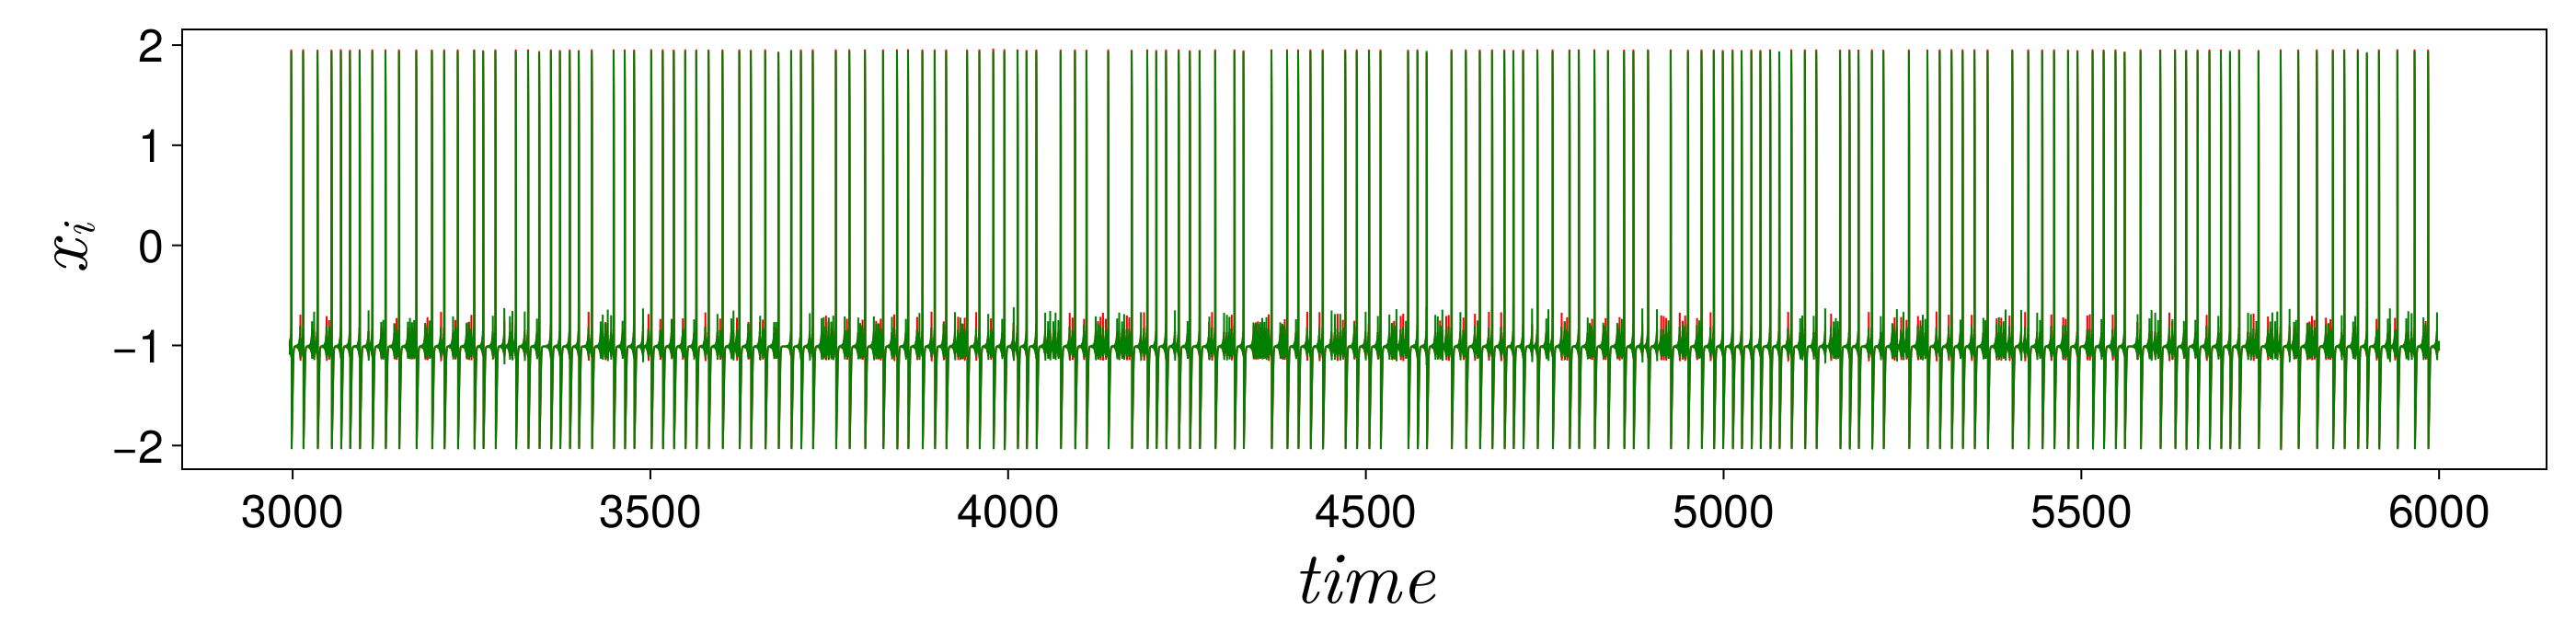

CairoMakie.Screen{IMAGE}


In [359]:
soltimeseries = sol

tstart = floor(Int64, length(soltimeseries) / 2); tend = length(soltimeseries)
f = Figure(size = (1400, 350))
ax = Axis(f[1,1], xlabel = L"time", ylabel = L"x_i", xlabelsize = labelsize, ylabelsize = labelsize,
 xticklabelsize = ticksize, yticklabelsize = ticksize, xgridvisible = false, ygridvisible = false)

lines!(ax, soltimeseries.t[tstart:tend], soltimeseries[indexx, tstart:tend], color = :red, linewidth = lw)
lines!(ax, soltimeseries.t[tstart:tend], soltimeseries[indexy, tstart:tend], color = :green, linewidth = lw)

display(f)

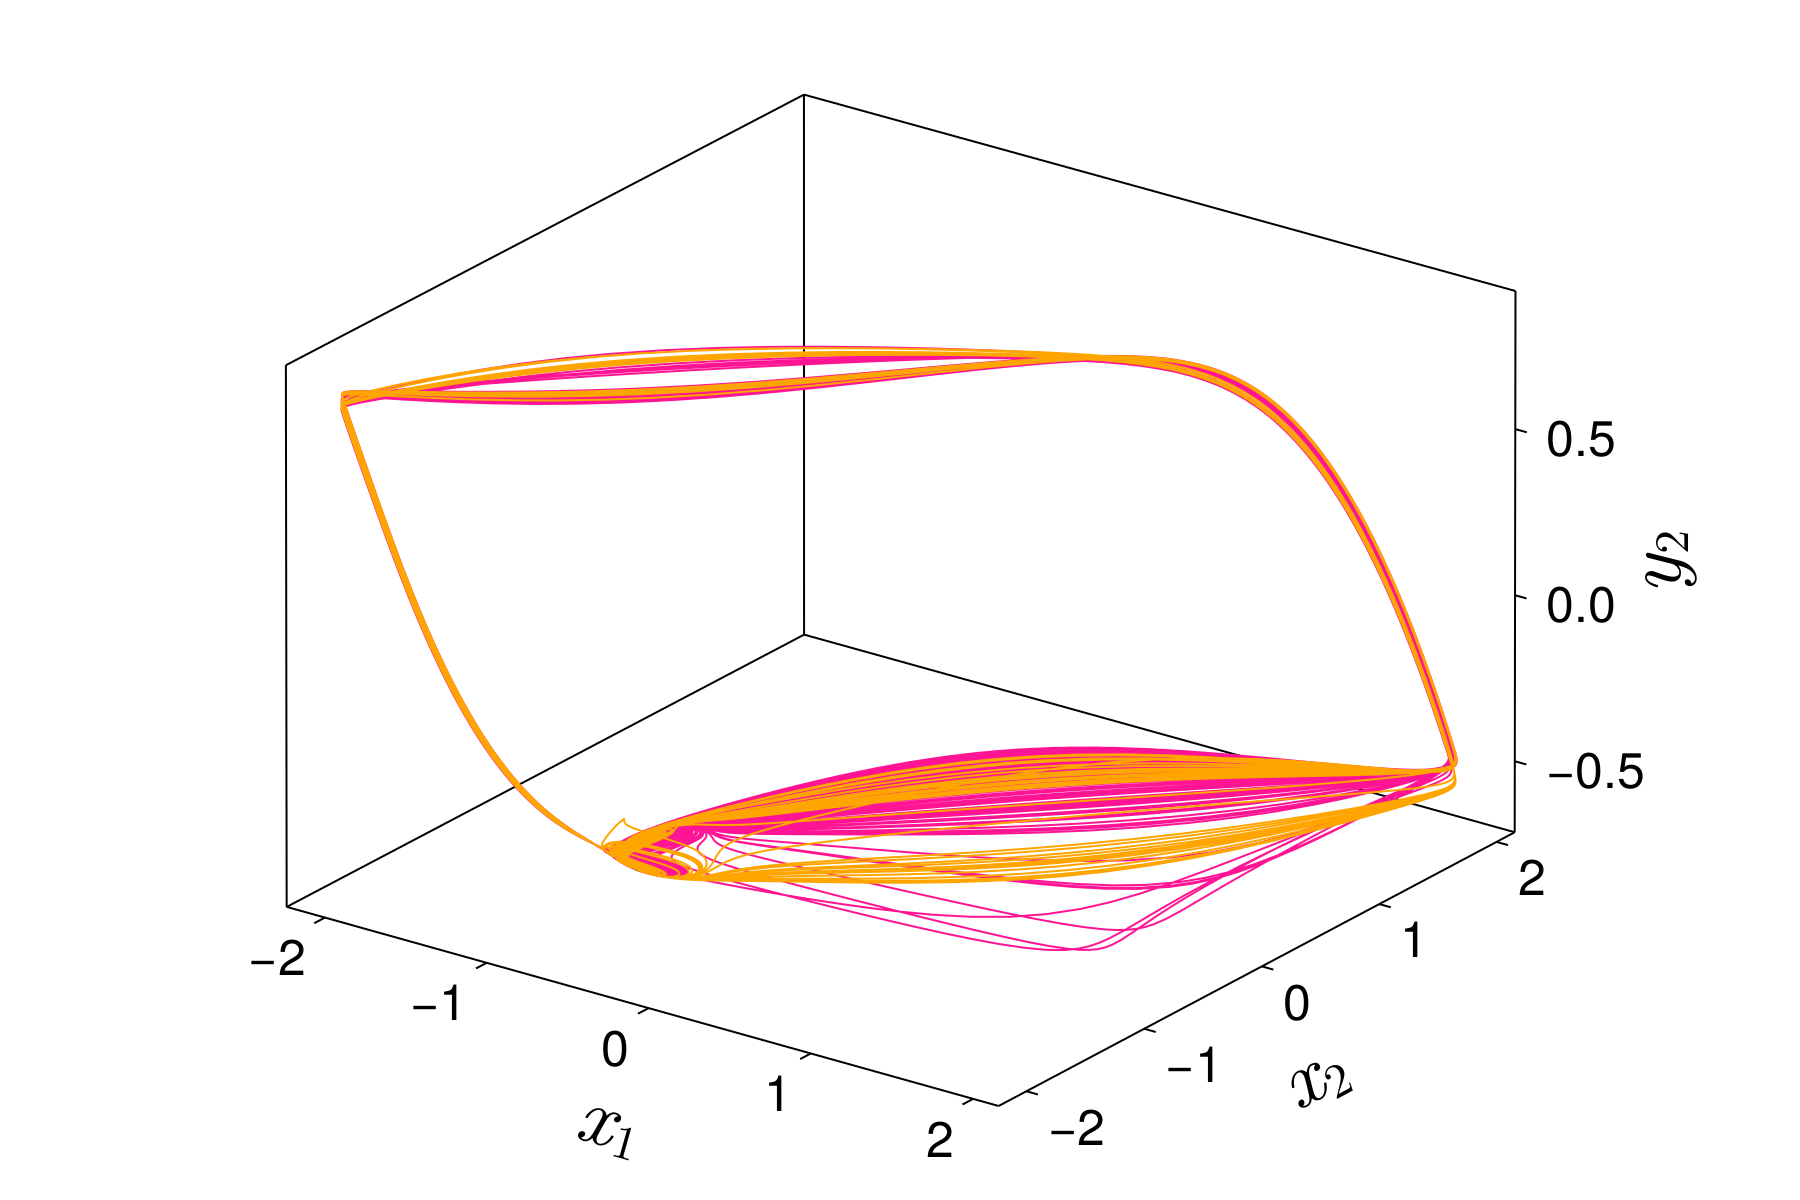

CairoMakie.Screen{IMAGE}


In [360]:
indexx, indexy, indexz = 1, 3, 4
az = -0.3pi
f = Figure(size = (900, 600))
ax3d = Axis3(f[1, 1], xlabel = L"x_1", ylabel = L"x_2", zlabel = L"y_2", xlabelsize = labelsize, ylabelsize = labelsize, zlabelsize = labelsize,
 xticklabelsize = ticksize, yticklabelsize = ticksize, zticklabelsize = ticksize,
    azimuth = az, xgridvisible = false, ygridvisible = false, zgridvisible = false)

tst2 = 100000
tst1 = 100000

lines!(ax3d, sol[indexx, tst1:length(sol)],
 sol[indexy, tst1:length(sol)],
  sol[indexz, tst1:length(sol)], linewidth = lw, color = colorline)

lines!(ax3d, sol1[indexx, floor(Int64, length(sol1)/4):length(sol1)],
 sol1[indexy, floor(Int64, length(sol1)/4):length(sol1)],
  sol1[indexz, floor(Int64, length(sol1)/4):length(sol1)], linewidth = lw, color = :black)

lines!(ax3d, sol2[indexx, tst2:length(sol2)],
 sol2[indexy, tst2:length(sol2)],
  sol2[indexz, tst2:length(sol2)], linewidth = lw, color = :orange)

display(f)

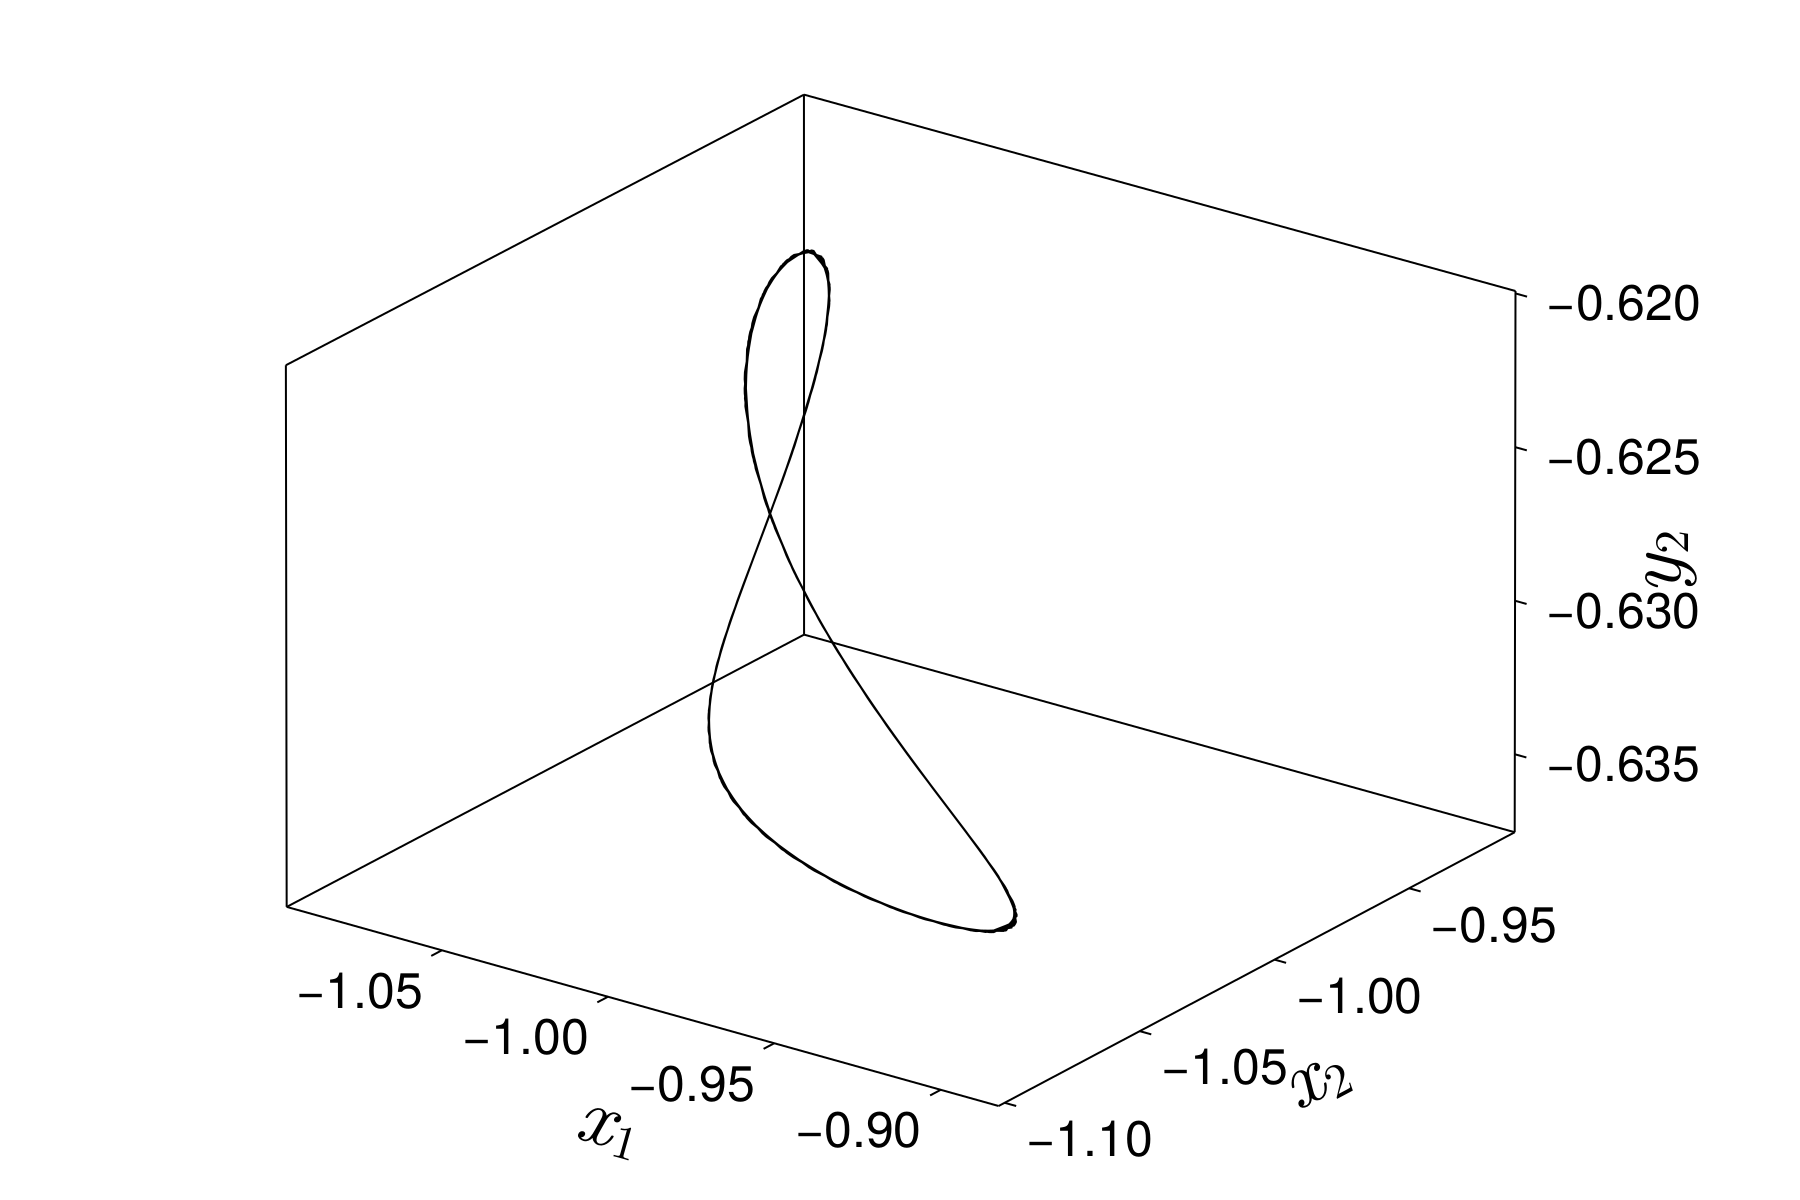

CairoMakie.Screen{IMAGE}


In [361]:
indexx, indexy, indexz = 1, 3, 4
az = -0.3pi
f = Figure(size = (900, 600))
ax3d = Axis3(f[1, 1], xlabel = L"x_1", ylabel = L"x_2", zlabel = L"y_2", xlabelsize = labelsize, ylabelsize = labelsize, zlabelsize = labelsize,
 xticklabelsize = ticksize, yticklabelsize = ticksize, zticklabelsize = ticksize,
    azimuth = az, xgridvisible = false, ygridvisible = false, zgridvisible = false)

lines!(ax3d, sol1[indexx, floor(Int64, length(sol1)/2):length(sol1)],
sol1[indexy, floor(Int64, length(sol1)/2):length(sol1)],
  sol1[indexz, floor(Int64, length(sol1)/2):length(sol1)], linewidth = lw, color = :black)
   
display(f)

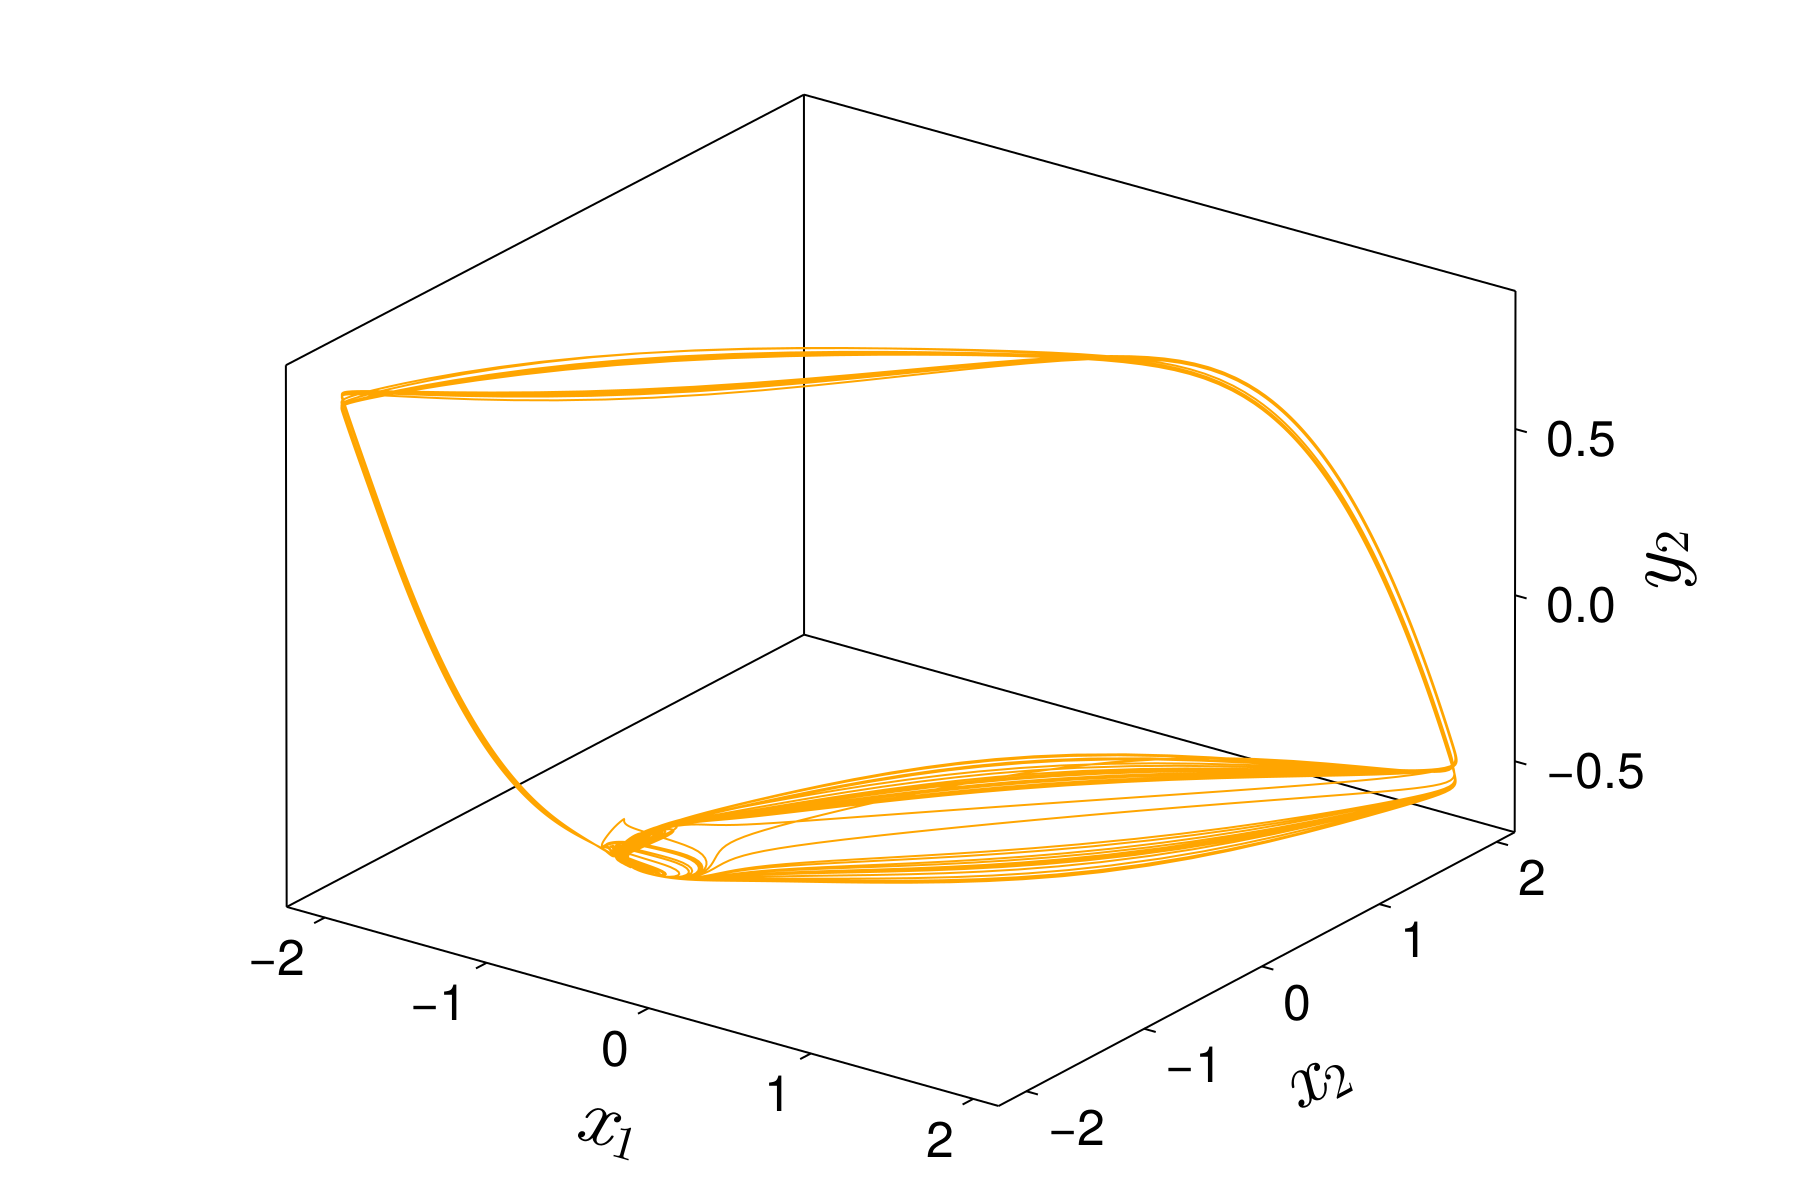

CairoMakie.Screen{IMAGE}


In [362]:
indexx, indexy, indexz = 1, 3, 4
az = -0.3pi
f = Figure(size = (900, 600))
ax3d = Axis3(f[1, 1], xlabel = L"x_1", ylabel = L"x_2", zlabel = L"y_2", xlabelsize = labelsize, ylabelsize = labelsize, zlabelsize = labelsize,
 xticklabelsize = ticksize, yticklabelsize = ticksize, zticklabelsize = ticksize,
    azimuth = az, xgridvisible = false, ygridvisible = false, zgridvisible = false)

tst2 = 100000
lines!(ax3d, sol2[indexx, tst2:length(sol2)],
 sol2[indexy, tst2:length(sol2)],
  sol2[indexz, tst2:length(sol2)], linewidth = lw, color = :orange)

display(f)

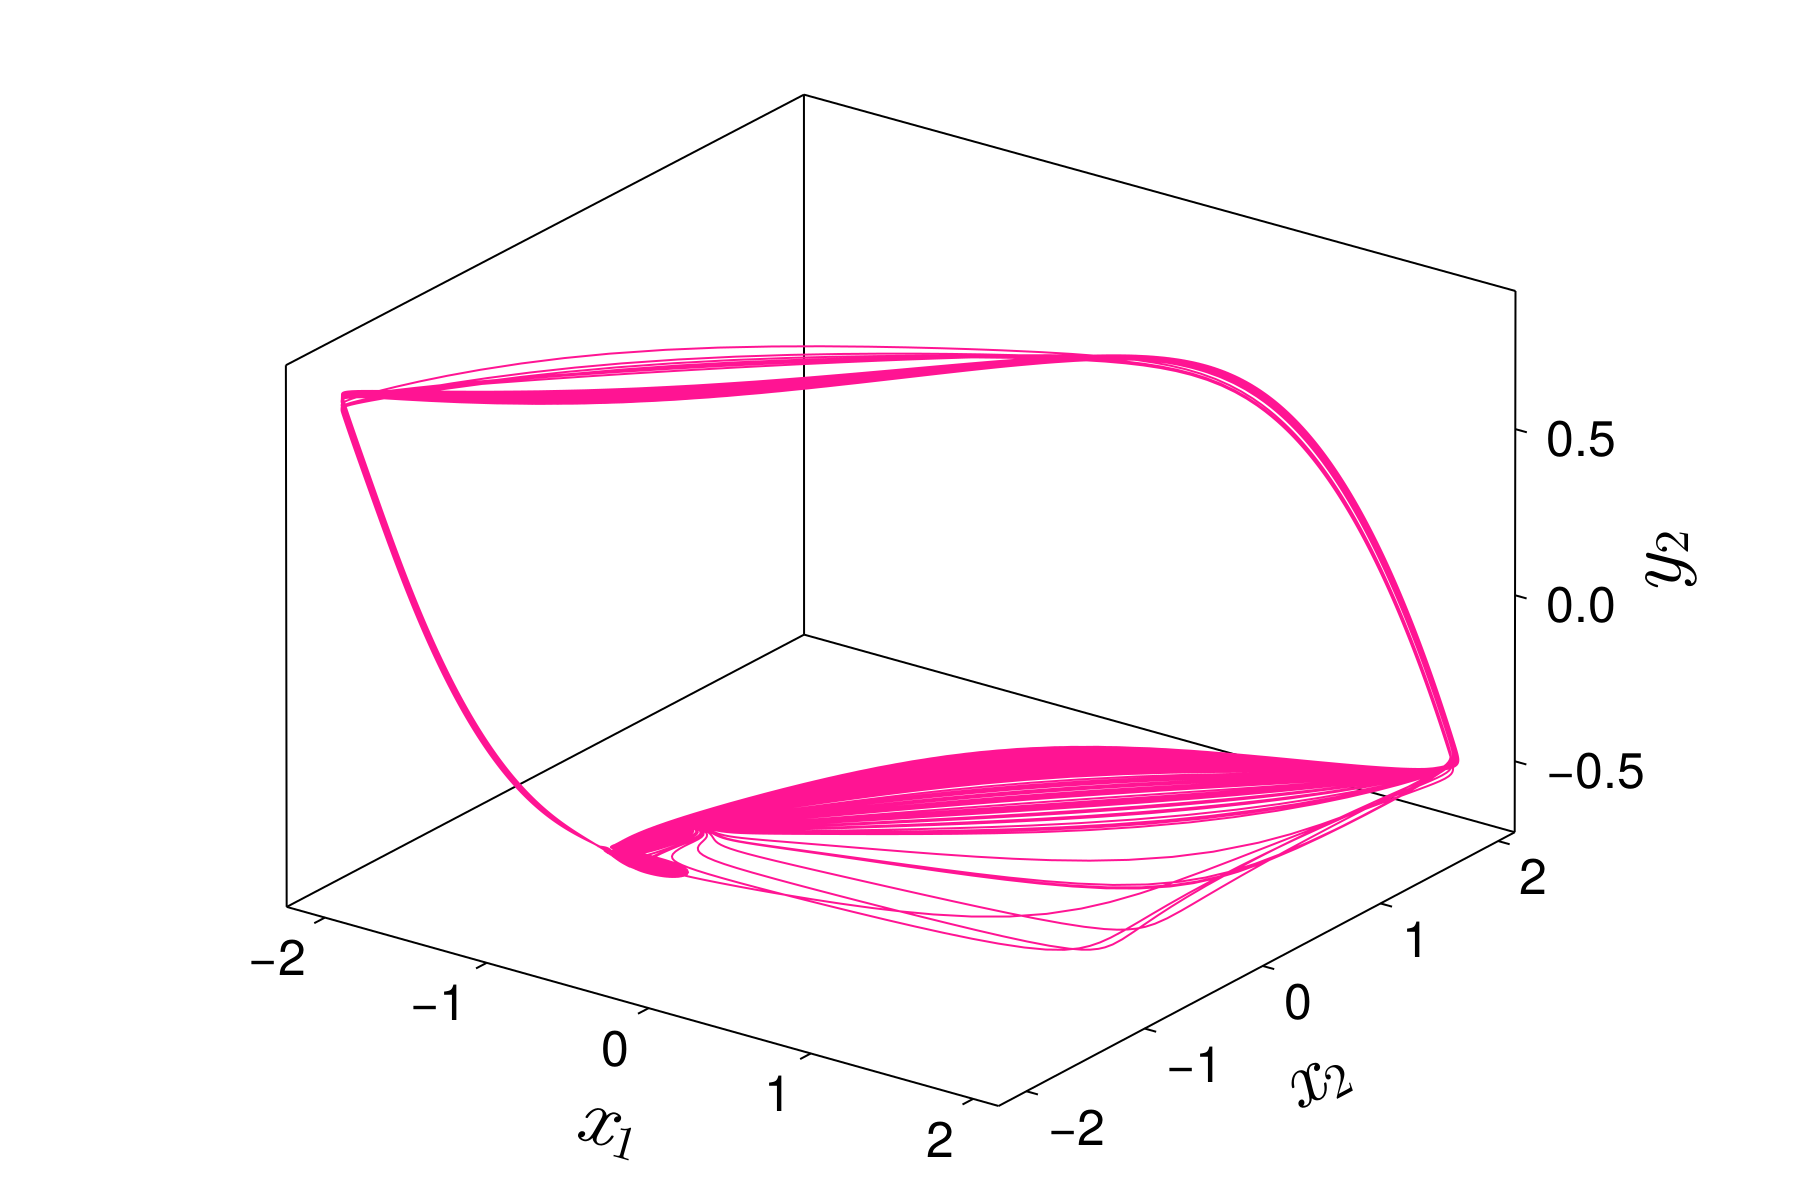

CairoMakie.Screen{IMAGE}


In [363]:
indexx, indexy, indexz = 1, 3, 4
az = -0.3pi
f = Figure(size = (900, 600))
ax3d = Axis3(f[1, 1], xlabel = L"x_1", ylabel = L"x_2", zlabel = L"y_2", xlabelsize = labelsize, ylabelsize = labelsize, zlabelsize = labelsize,
 xticklabelsize = ticksize, yticklabelsize = ticksize, zticklabelsize = ticksize,
    azimuth = az, xgridvisible = false, ygridvisible = false, zgridvisible = false)

tst1 = 100000
lines!(ax3d, sol[indexx, tst1:length(sol)],
 sol[indexy, tst1:length(sol)],
  sol[indexz, tst1:length(sol)], linewidth = lw, color = colorline)

display(f)

In [95]:
#=integ_set = (alg = RK4(), adaptive = false, dt = 0.001)
ds = CoupledODEs(FHN2_try3, sol[1], parameters, diffeq = integ_set)

pmap = PoincareMap(ds, (4, 0.))

tr, trange = trajectory(pmap, 10000)=#

(5-dimensional StateSpaceSet{Float64} with 10001 points, 0:1:10000)

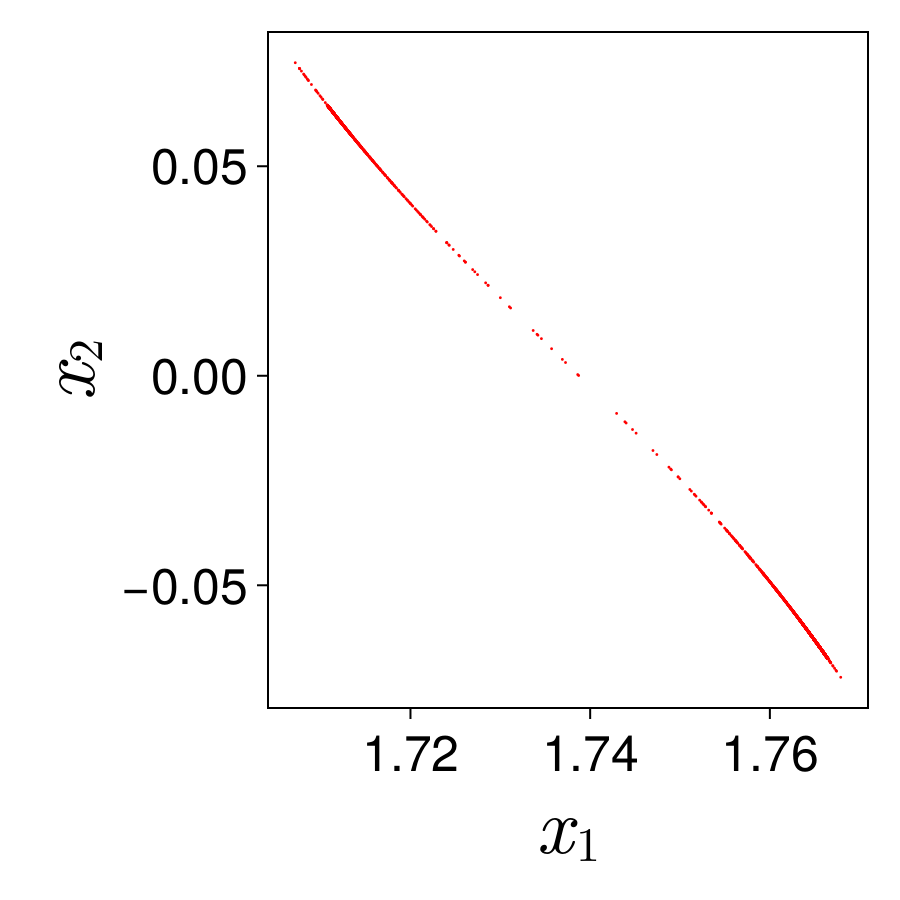

CairoMakie.Screen{IMAGE}


In [96]:
#=tstartpo = 100; tendpo = length(tr)
indexx = 1; indexy = 2

f = Figure(size = (450, 450))
ax = Axis(f[1, 1], xgridvisible = false, ygridvisible = false,
xlabel = L"x_1", ylabel = L"x_2", xlabelsize = labelsize, ylabelsize = labelsize,
xticklabelsize = ticksize, yticklabelsize = ticksize)
scatter!(tr[tstartpo:tendpo, indexx], tr[tstartpo:tendpo, indexy], color = :red, markersize = 2.0)

display(f)=#